In [ ]:
# 11월 7일 결함 주파수 수정까지

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import mlflow

In [3]:
folder_path = r"C:\Users\medici\901"
file_name = "data.csv"
file_path = os.path.join(folder_path, file_name)

data = pd.read_csv(file_path)

print(data.head())

   Mean Frequency  Centroid Frequency  Max Amplitude Frequency  \
0     4179.343397         4179.343397                   2677.0   
1     4082.227523         4082.227523                   2891.0   
2     4306.796631         4306.796631                   2860.0   
3     4453.107119         4453.107119                   2891.0   
4     4441.973349         4441.973349                   2673.0   

   Spectral Std Dev  Spectral Energy  Spectral Skewness  Frequency_1  \
0       2653.676802     1.826383e+09           5.227653         30.0   
1       2791.732695     3.800051e+09          11.297647         30.0   
2       2832.823117     5.054293e+09          15.107161         30.0   
3       2796.676181     3.997255e+09          10.491228         30.0   
4       2736.221973     2.112629e+09           6.298034         30.0   

    Amplitude_1  Frequency_2   Amplitude_2  ...  impulse_factor     margin  \
0  19200.289909         60.0  13227.180478  ...       42.870505  39.312629   
1  35239.24859

In [4]:
# 데이터프레임 전체에 NaN 값이 있는지 확인
print(data.isna().any().any())  # True 또는 False 반환

# 각 열별 NaN 값 개수 확인
print(data.isna().sum())


False
Mean Frequency             0
Centroid Frequency         0
Max Amplitude Frequency    0
Spectral Std Dev           0
Spectral Energy            0
Spectral Skewness          0
Frequency_1                0
Amplitude_1                0
Frequency_2                0
Amplitude_2                0
Frequency_3                0
Amplitude_3                0
Frequency_4                0
Amplitude_4                0
Frequency_5                0
Amplitude_5                0
Frequency_6                0
Amplitude_6                0
Frequency_7                0
Amplitude_7                0
Frequency_8                0
Amplitude_8                0
Frequency_9                0
Amplitude_9                0
Frequency_10               0
Amplitude_10               0
Hz                         0
speed                      0
mean                       0
absolute_mean              0
absolute_max               0
std                        0
variance                   0
peak_to_peak               0
peak    

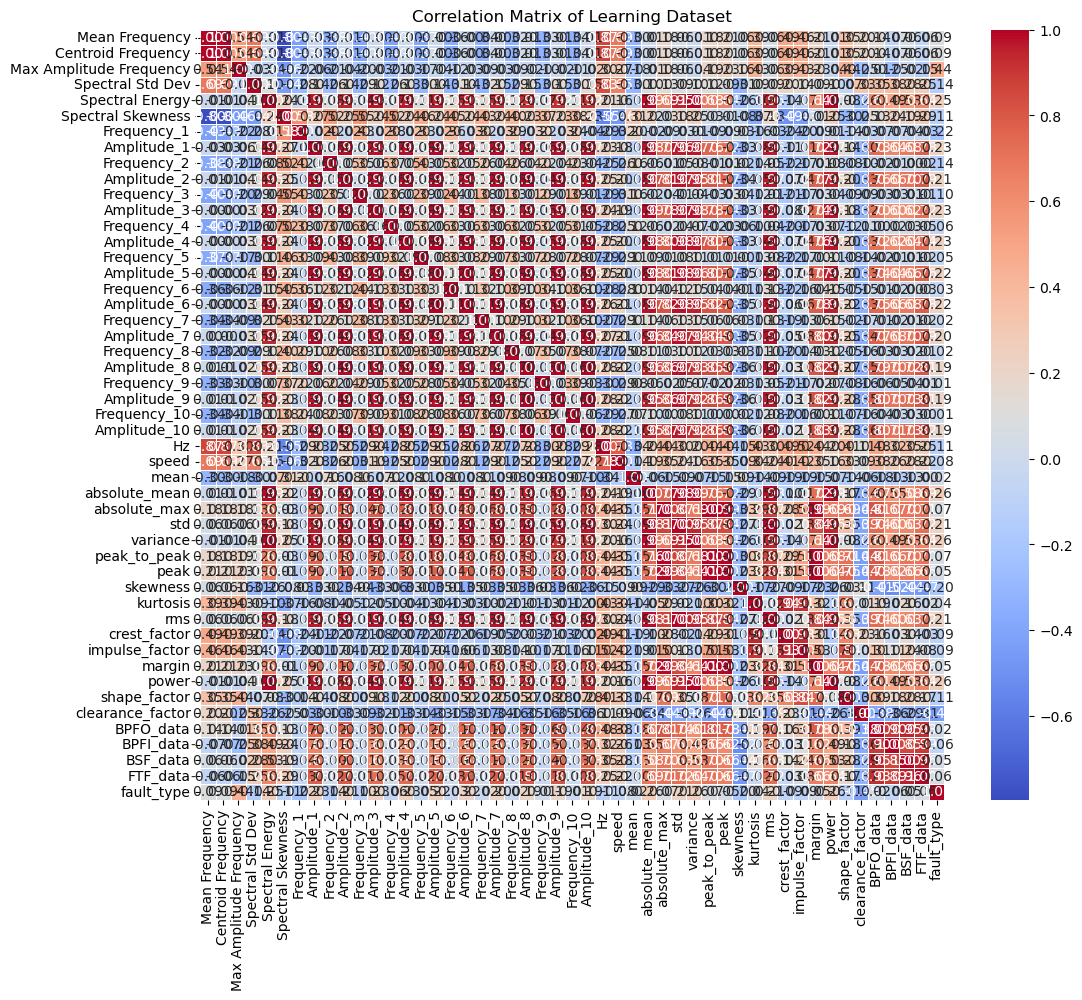

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 상관계수 계산
correlation_matrix = data.corr()

# 그래프 크기 설정
plt.figure(figsize=(12, 10))

# 상관계수 히트맵 생성
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Learning Dataset")
plt.show()

In [6]:
data1 = data.drop(columns=[f'Amplitude_{i}' for i in range(2, 11)])

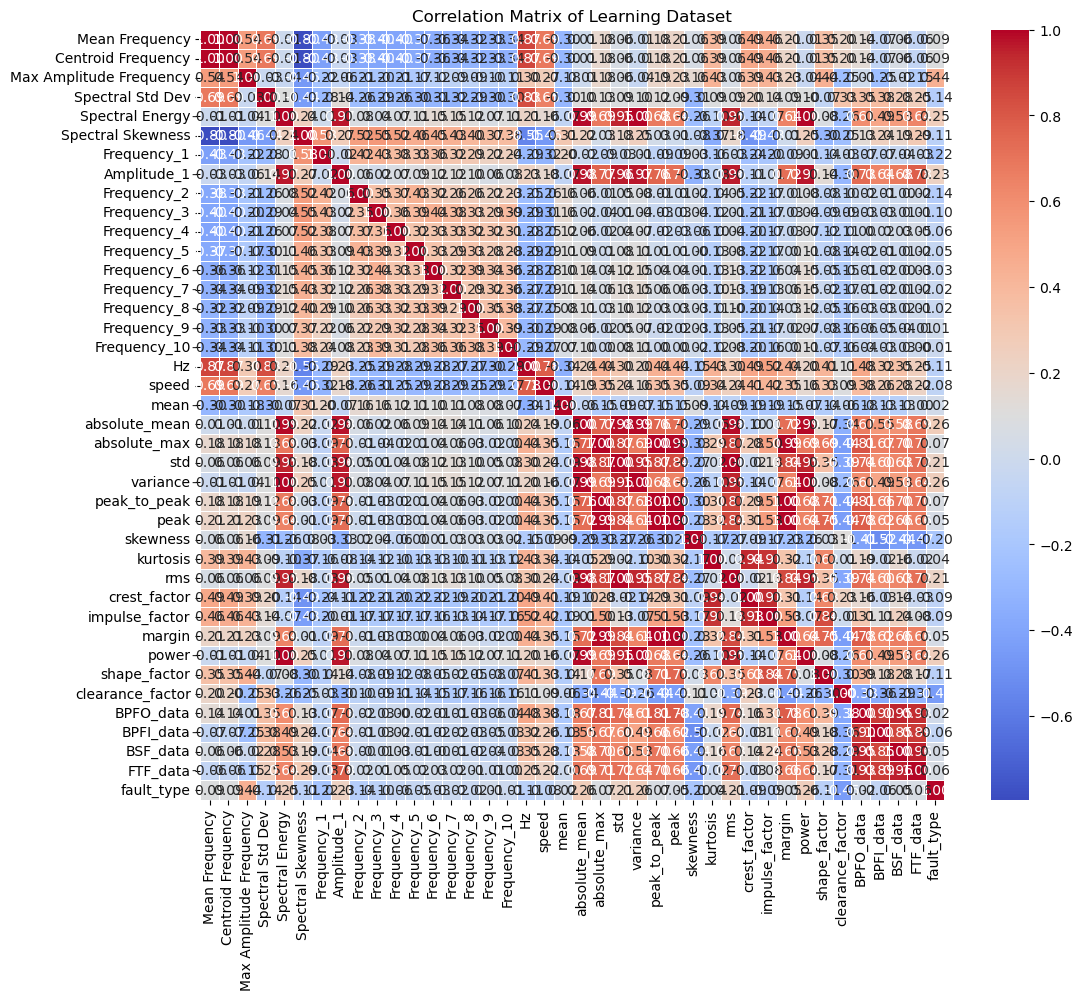

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 상관계수 계산
correlation_matrix = data1.corr()

# 그래프 크기 설정
plt.figure(figsize=(12, 10))

# 상관계수 히트맵 생성
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Learning Dataset")
plt.show()

In [8]:
import pandas as pd

# 상관계수 계산
correlation_matrix = data1.corr()

# 상관계수 0.9 이상인 쌍 추출
high_corr_pairs = [
    (col1, col2) 
    for col1 in correlation_matrix.columns 
    for col2 in correlation_matrix.columns 
    if col1 != col2 and correlation_matrix.loc[col1, col2] >= 0.9
]

print(high_corr_pairs)


[('Mean Frequency', 'Centroid Frequency'), ('Centroid Frequency', 'Mean Frequency'), ('Spectral Energy', 'Amplitude_1'), ('Spectral Energy', 'absolute_mean'), ('Spectral Energy', 'std'), ('Spectral Energy', 'variance'), ('Spectral Energy', 'rms'), ('Spectral Energy', 'power'), ('Amplitude_1', 'Spectral Energy'), ('Amplitude_1', 'absolute_mean'), ('Amplitude_1', 'std'), ('Amplitude_1', 'variance'), ('Amplitude_1', 'rms'), ('Amplitude_1', 'power'), ('absolute_mean', 'Spectral Energy'), ('absolute_mean', 'Amplitude_1'), ('absolute_mean', 'std'), ('absolute_mean', 'variance'), ('absolute_mean', 'rms'), ('absolute_mean', 'power'), ('absolute_max', 'peak_to_peak'), ('absolute_max', 'peak'), ('absolute_max', 'margin'), ('std', 'Spectral Energy'), ('std', 'Amplitude_1'), ('std', 'absolute_mean'), ('std', 'variance'), ('std', 'rms'), ('std', 'power'), ('variance', 'Spectral Energy'), ('variance', 'Amplitude_1'), ('variance', 'absolute_mean'), ('variance', 'std'), ('variance', 'rms'), ('variance

In [9]:
columns_to_drop = [
    'Centroid Frequency', 'Amplitude_1', 'absolute_mean', 'absolute_max', 'std', 
    'variance', 'peak', 'crest_factor', 'impulse_factor', 'margin', 
    'power', 'BSF_data', 'FTF_data'
]

# 특성 삭제
data2 = data1.drop(columns=columns_to_drop)

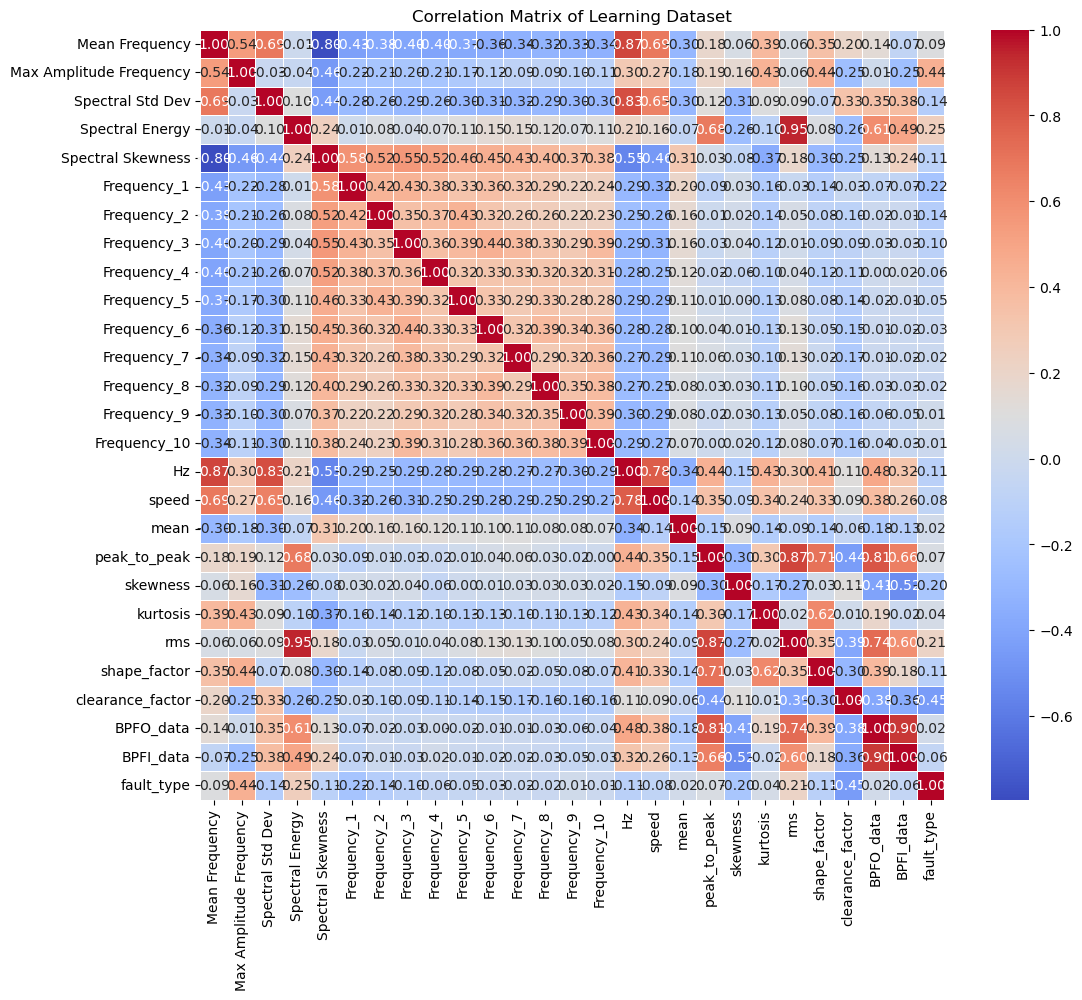

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 상관계수 계산
correlation_matrix = data2.corr()

# 그래프 크기 설정
plt.figure(figsize=(12, 10))

# 상관계수 히트맵 생성
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Learning Dataset")
plt.show()

In [12]:
import pandas as pd

# 상관계수 계산
correlation_matrix = data2.corr()

# 상관계수 0.9 이상인 쌍 추출
high_corr_pairs = [
    (col1, col2) 
    for col1 in correlation_matrix.columns 
    for col2 in correlation_matrix.columns 
    if col1 != col2 and correlation_matrix.loc[col1, col2] >= 0.9
]

print(high_corr_pairs)

[('Spectral Energy', 'rms'), ('rms', 'Spectral Energy')]


In [13]:
data2

,Mean Frequency,Max Amplitude Frequency,Spectral Std Dev,Spectral Energy,Spectral Skewness,Frequency_1,Frequency_2,Frequency_3,Frequency_4,Frequency_5,...,mean,peak_to_peak,skewness,kurtosis,rms,shape_factor,clearance_factor,BPFO_data,BPFI_data,fault_type
0,4179.343397,2677.0,2653.676802,1.826383e+09,5.227653,30.0,60.0,9.0,21.0,90.0,...,0.000028,81.484932,-0.216619,50.233617,2.360864,2.399952,7.566325,4325.893033,8399.914759,1
1,4082.227523,2891.0,2791.732695,3.800051e+09,11.297647,30.0,60.0,158.0,39.0,188.0,...,-0.006530,89.227451,-0.897048,30.692305,3.405406,2.341031,4.416381,17576.165644,19165.406443,1
2,4306.796631,2860.0,2832.823117,5.054293e+09,15.107161,30.0,60.0,158.0,188.0,89.0,...,0.002405,98.076013,-0.198037,29.164452,3.927400,2.395486,3.320428,17879.279616,18716.323862,1
3,4453.107119,2891.0,2796.676181,3.997255e+09,10.491228,30.0,60.0,188.0,158.0,90.0,...,-0.000012,100.392707,-0.223575,41.729800,3.492657,2.501372,4.198985,8884.645321,14014.586957,1
4,4441.973349,2673.0,2736.221973,2.112629e+09,6.298034,30.0,60.0,158.0,188.0,128.0,...,0.003668,81.114220,0.460944,51.906959,2.539138,2.473891,6.378236,4160.938421,9057.216007,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2534,2659.175914,1437.0,1158.622978,6.884099e+05,5.784874,1.0,8.0,7.0,18.0,14.0,...,0.004379,2.134885,0.031573,8.216062,0.097684,1.364135,115.177927,129.427430,331.774851,2
2535,2550.497865,1437.0,1209.170610,6.223204e+05,6.854876,8.0,3.0,11.0,5.0,23.0,...,0.004041,1.537449,0.020710,2.013704,0.092882,1.293432,92.279291,149.986843,319.693236,2
2536,2499.389539,1437.0,1170.237794,1.957043e+06,3.920975,18.0,6.0,12.0,11.0,17.0,...,0.004409,3.978361,0.399434,18.445335,0.164808,1.590760,83.873668,151.309847,312.541168,2
2537,2655.610496,1437.0,1121.313151,2.420799e+06,3.763660,12.0,18.0,6.0,11.0,15.0,...,0.004473,2.950309,0.240142,6.895322,0.183309,1.476511,52.715453,163.449610,322.985235,2


In [14]:
import pandas as pd
from sklearn.model_selection import StratifiedKFold, GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, classification_report
import lightgbm as lgb
import mlflow
import mlflow.sklearn

# X, y 분리
X = data2.drop(columns=['fault_type'])
y = data2['fault_type']

# 학습 및 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# 스케일링 (train과 test를 별도로 스케일링)
scaler_train = StandardScaler()
X_train = scaler_train.fit_transform(X_train)

scaler_test = StandardScaler()
X_test = scaler_test.fit_transform(X_test)

# PCA 적용 (95% 분산을 유지하도록 설정)
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# 파라미터 범위 설정
param_grid = {
    'max_depth': [9, 10, 11],
    'min_child_samples': [10, 20],
    'feature_fraction': [0.5, 0.55],
    'lambda_l2': [0.0, 0.1, 1.0],
    'learning_rate': [0.01, 0.05, 0.1]
}

# 모델 및 교차 검증 설정
model = lgb.LGBMClassifier(verbose=-1)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# GridSearchCV로 파라미터 튜닝
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=cv, scoring='accuracy', n_jobs=1, verbose=1)

# MLflow 실험 시작
with mlflow.start_run():
    # GridSearchCV를 통한 최적 파라미터 탐색
    grid_search.fit(X_train_pca, y_train)
    
    # 최적 파라미터로 설정된 모델 추출
    best_model = grid_search.best_estimator_
    
    # 최적 파라미터 로깅
    for param, value in grid_search.best_params_.items():
        mlflow.log_param(param, value)

    # 교차 검증 결과 로깅
    mlflow.log_metric("best_cv_accuracy", grid_search.best_score_)
    
    # 교차 검증 결과 출력
    print(f"Best Cross-Validation Accuracy: {grid_search.best_score_:.4f}")
    print(f"Best Parameters: {grid_search.best_params_}")

    # 최적 파라미터로 학습 및 예측
    best_model.fit(X_train_pca, y_train)
    y_pred = best_model.predict(X_test_pca)

    # 성능 평가
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, target_names=[str(label) for label in y.unique()])

    # 테스트 성능 로깅
    mlflow.log_metric("test_accuracy", accuracy)

    # 모델 로깅 (input_example 추가)
    mlflow.sklearn.log_model(best_model, "LightGBMModel", input_example=X_test_pca[:5])

    # 결과 출력
    print(f"\nTest Set Accuracy: {accuracy:.4f}")
    print("\nClassification Report on Test Set:\n", report)

    # Classification report의 f1-score 등의 메트릭을 MLflow에 로깅
    report_dict = classification_report(y_test, y_pred, output_dict=True)
    for label, metrics in report_dict.items():
        if isinstance(metrics, dict):  # 클래스별 메트릭 로깅
            mlflow.log_metric(f"{label}_precision", metrics["precision"])
            mlflow.log_metric(f"{label}_recall", metrics["recall"])
            mlflow.log_metric(f"{label}_f1-score", metrics["f1-score"])

print("모델 학습과 평가가 완료되었고, MLflow에 기록되었습니다.")



Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Cross-Validation Accuracy: 0.9449
Best Parameters: {'feature_fraction': 0.5, 'lambda_l2': 0.0, 'learning_rate': 0.1, 'max_depth': 9, 'min_child_samples': 20}

Test Set Accuracy: 0.9331

Classification Report on Test Set:
               precision    recall  f1-score   support

           1       1.00      0.98      0.99       106
           2       0.93      0.94      0.94       134
           3       0.90      0.90      0.90       134
           0       0.91      0.93      0.92       134

    accuracy                           0.93       508
   macro avg       0.94      0.94      0.94       508
weighted avg       0.93      0.93      0.93       508

모델 학습과 평가가 완료되었고, MLflow에 기록되었습니다.


In [15]:
import pandas as pd
from sklearn.model_selection import StratifiedKFold, GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
import lightgbm as lgb
import mlflow
import mlflow.sklearn

# X, y 분리
X = data2.drop(columns=['fault_type'])
y = data2['fault_type']

# 학습 및 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# 스케일링 (train과 test를 별도로 스케일링)
scaler_train = StandardScaler()
X_train = scaler_train.fit_transform(X_train)

scaler_test = StandardScaler()
X_test = scaler_test.fit_transform(X_test)

# 파라미터 범위 설정
param_grid = {
    'max_depth': [5, 6, 7],                   # 모델 복잡도 줄이기
    'num_leaves': [15, 20, 30],               # 최대 잎 노드 수 감소
    'min_child_samples': [15, 20, 30],        # 잎당 최소 데이터 수 증가
    'lambda_l1': [0.0, 0.1, 1.0],             # L1 정규화 
    'lambda_l2': [0.0, 0.1, 1.0],
    'feature_fraction': [0.5, 0.7, 0.8],      # 트리별 특성 샘플링 비율
    'bagging_fraction': [0.5, 0.7, 0.8],      # 트리별 데이터 샘플링 비율
    'bagging_freq': [1]                       # 데이터 샘플링 주기
}


# 모델 및 교차 검증 설정
model = lgb.LGBMClassifier(verbose=-1)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# GridSearchCV로 파라미터 튜닝
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=cv, scoring='accuracy', n_jobs=1, verbose=1)

# MLflow 실험 시작
with mlflow.start_run():
    # GridSearchCV를 통한 최적 파라미터 탐색
    grid_search.fit(X_train, y_train)
    
    # 최적 파라미터로 설정된 모델 추출
    best_model = grid_search.best_estimator_
    
    # 최적 파라미터 로깅
    for param, value in grid_search.best_params_.items():
        mlflow.log_param(param, value)

    # 교차 검증 결과 로깅
    mlflow.log_metric("best_cv_accuracy", grid_search.best_score_)
    
    # 교차 검증 결과 출력
    print(f"Best Cross-Validation Accuracy: {grid_search.best_score_:.4f}")
    print(f"Best Parameters: {grid_search.best_params_}")

    # 최적 파라미터로 학습 및 예측
    best_model.fit(X_train, y_train)
    y_pred = best_model.predict(X_test)

    # 성능 평가
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, target_names=[str(label) for label in y.unique()])

    # 테스트 성능 로깅
    mlflow.log_metric("test_accuracy", accuracy)

    # 모델 로깅 (input_example 추가)
    mlflow.sklearn.log_model(best_model, "LightGBMModel", input_example=X_test[:5])

    # 결과 출력
    print(f"\nTest Set Accuracy: {accuracy:.4f}")
    print("\nClassification Report on Test Set:\n", report)

    # Classification report의 f1-score 등의 메트릭을 MLflow에 로깅
    report_dict = classification_report(y_test, y_pred, output_dict=True)
    for label, metrics in report_dict.items():
        if isinstance(metrics, dict):  # 클래스별 메트릭 로깅
            mlflow.log_metric(f"{label}_precision", metrics["precision"])
            mlflow.log_metric(f"{label}_recall", metrics["recall"])
            mlflow.log_metric(f"{label}_f1-score", metrics["f1-score"])

print("모델 학습과 평가가 완료되었고, MLflow에 기록되었습니다.")


Fitting 5 folds for each of 2187 candidates, totalling 10935 fits
Best Cross-Validation Accuracy: 0.9916
Best Parameters: {'bagging_fraction': 0.8, 'bagging_freq': 1, 'feature_fraction': 0.5, 'lambda_l1': 0.0, 'lambda_l2': 0.0, 'max_depth': 5, 'min_child_samples': 20, 'num_leaves': 20}

Test Set Accuracy: 0.9567

Classification Report on Test Set:
               precision    recall  f1-score   support

           1       0.98      1.00      0.99       106
           2       0.98      0.92      0.95       134
           3       0.96      0.96      0.96       134
           0       0.91      0.96      0.93       134

    accuracy                           0.96       508
   macro avg       0.96      0.96      0.96       508
weighted avg       0.96      0.96      0.96       508

모델 학습과 평가가 완료되었고, MLflow에 기록되었습니다.


In [16]:
data3=data2.drop('rms', axis =1)

In [17]:
import pandas as pd
from sklearn.model_selection import StratifiedKFold, GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
import lightgbm as lgb
import mlflow
import mlflow.sklearn

# X, y 분리
X = data3.drop(columns=['fault_type'])
y = data3['fault_type']

# 학습 및 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# 스케일링 (train과 test를 별도로 스케일링)
scaler_train = StandardScaler()
X_train = scaler_train.fit_transform(X_train)

scaler_test = StandardScaler()
X_test = scaler_test.fit_transform(X_test)

# 파라미터 범위 설정
param_grid = {
    'max_depth': [5, 6, 7],                   # 모델 복잡도 줄이기
    'num_leaves': [15, 20, 30],               # 최대 잎 노드 수 감소
    'min_child_samples': [15, 20, 30],        # 잎당 최소 데이터 수 증가
    'lambda_l1': [0.0, 0.1, 1.0],             # L1 정규화 
    'lambda_l2': [0.0, 0.1, 1.0],
    'feature_fraction': [0.5, 0.7, 0.8],      # 트리별 특성 샘플링 비율
    'bagging_fraction': [0.5, 0.7, 0.8],      # 트리별 데이터 샘플링 비율
    'bagging_freq': [1]                       # 데이터 샘플링 주기
}


# 모델 및 교차 검증 설정
model = lgb.LGBMClassifier(verbose=-1)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# GridSearchCV로 파라미터 튜닝
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=cv, scoring='accuracy', n_jobs=1, verbose=1)

# MLflow 실험 시작
with mlflow.start_run():
    # GridSearchCV를 통한 최적 파라미터 탐색
    grid_search.fit(X_train, y_train)
    
    # 최적 파라미터로 설정된 모델 추출
    best_model = grid_search.best_estimator_
    
    # 최적 파라미터 로깅
    for param, value in grid_search.best_params_.items():
        mlflow.log_param(param, value)

    # 교차 검증 결과 로깅
    mlflow.log_metric("best_cv_accuracy", grid_search.best_score_)
    
    # 교차 검증 결과 출력
    print(f"Best Cross-Validation Accuracy: {grid_search.best_score_:.4f}")
    print(f"Best Parameters: {grid_search.best_params_}")

    # 최적 파라미터로 학습 및 예측
    best_model.fit(X_train, y_train)
    y_pred = best_model.predict(X_test)

    # 성능 평가
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, target_names=[str(label) for label in y.unique()])

    # 테스트 성능 로깅
    mlflow.log_metric("test_accuracy", accuracy)

    # 모델 로깅 (input_example 추가)
    mlflow.sklearn.log_model(best_model, "LightGBMModel", input_example=X_test[:5])

    # 결과 출력
    print(f"\nTest Set Accuracy: {accuracy:.4f}")
    print("\nClassification Report on Test Set:\n", report)

    # Classification report의 f1-score 등의 메트릭을 MLflow에 로깅
    report_dict = classification_report(y_test, y_pred, output_dict=True)
    for label, metrics in report_dict.items():
        if isinstance(metrics, dict):  # 클래스별 메트릭 로깅
            mlflow.log_metric(f"{label}_precision", metrics["precision"])
            mlflow.log_metric(f"{label}_recall", metrics["recall"])
            mlflow.log_metric(f"{label}_f1-score", metrics["f1-score"])

print("모델 학습과 평가가 완료되었고, MLflow에 기록되었습니다.")

Fitting 5 folds for each of 2187 candidates, totalling 10935 fits
Best Cross-Validation Accuracy: 0.9921
Best Parameters: {'bagging_fraction': 0.7, 'bagging_freq': 1, 'feature_fraction': 0.5, 'lambda_l1': 0.0, 'lambda_l2': 0.0, 'max_depth': 5, 'min_child_samples': 15, 'num_leaves': 15}

Test Set Accuracy: 0.9626

Classification Report on Test Set:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00       106
           2       0.99      0.90      0.95       134
           3       0.98      0.98      0.98       134
           0       0.89      0.98      0.93       134

    accuracy                           0.96       508
   macro avg       0.97      0.96      0.96       508
weighted avg       0.97      0.96      0.96       508

모델 학습과 평가가 완료되었고, MLflow에 기록되었습니다.


In [18]:
import pandas as pd
from sklearn.model_selection import StratifiedKFold, GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
import lightgbm as lgb
import mlflow
import mlflow.sklearn

# X, y 분리
X = data3.drop(columns=['fault_type'])
y = data3['fault_type']

# 학습 및 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# 스케일링 (train과 test를 별도로 스케일링)
scaler_train = StandardScaler()
X_train = scaler_train.fit_transform(X_train)

scaler_test = StandardScaler()
X_test = scaler_test.fit_transform(X_test)

# 파라미터 범위 설정
param_grid = {
    'max_depth': [5, 6, 7],                   # 모델 복잡도 줄이기
    'num_leaves': [10, 15, 20],               # 최대 잎 노드 수 감소
    'min_child_samples': [10, 15, 20],        # 잎당 최소 데이터 수 증가
    'lambda_l1': [0.0, 0.1, 1.0],             # L1 정규화 
    'lambda_l2': [0.0, 0.1, 1.0],
    'feature_fraction': [0.4, 0.5, 0.7],      # 트리별 특성 샘플링 비율
    'bagging_fraction': [0.6, 0.7, 0.75],      # 트리별 데이터 샘플링 비율
}


# 모델 및 교차 검증 설정
model = lgb.LGBMClassifier(verbose=-1)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# GridSearchCV로 파라미터 튜닝
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=cv, scoring='accuracy', n_jobs=1, verbose=1)

# MLflow 실험 시작
with mlflow.start_run():
    # GridSearchCV를 통한 최적 파라미터 탐색
    grid_search.fit(X_train, y_train)
    
    # 최적 파라미터로 설정된 모델 추출
    best_model = grid_search.best_estimator_
    
    # 최적 파라미터 로깅
    for param, value in grid_search.best_params_.items():
        mlflow.log_param(param, value)

    # 교차 검증 결과 로깅
    mlflow.log_metric("best_cv_accuracy", grid_search.best_score_)
    
    # 교차 검증 결과 출력
    print(f"Best Cross-Validation Accuracy: {grid_search.best_score_:.4f}")
    print(f"Best Parameters: {grid_search.best_params_}")

    # 최적 파라미터로 학습 및 예측
    best_model.fit(X_train, y_train)
    y_pred = best_model.predict(X_test)

    # 성능 평가
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, target_names=[str(label) for label in y.unique()])

    # 테스트 성능 로깅
    mlflow.log_metric("test_accuracy", accuracy)

    # 모델 로깅 (input_example 추가)
    mlflow.sklearn.log_model(best_model, "LightGBMModel", input_example=X_test[:5])

    # 결과 출력
    print(f"\nTest Set Accuracy: {accuracy:.4f}")
    print("\nClassification Report on Test Set:\n", report)

    # Classification report의 f1-score 등의 메트릭을 MLflow에 로깅
    report_dict = classification_report(y_test, y_pred, output_dict=True)
    for label, metrics in report_dict.items():
        if isinstance(metrics, dict):  # 클래스별 메트릭 로깅
            mlflow.log_metric(f"{label}_precision", metrics["precision"])
            mlflow.log_metric(f"{label}_recall", metrics["recall"])
            mlflow.log_metric(f"{label}_f1-score", metrics["f1-score"])

print("모델 학습과 평가가 완료되었고, MLflow에 기록되었습니다.")

Fitting 5 folds for each of 2187 candidates, totalling 10935 fits
Best Cross-Validation Accuracy: 0.9921
Best Parameters: {'bagging_fraction': 0.6, 'feature_fraction': 0.4, 'lambda_l1': 0.0, 'lambda_l2': 0.1, 'max_depth': 5, 'min_child_samples': 15, 'num_leaves': 15}

Test Set Accuracy: 0.9488

Classification Report on Test Set:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00       106
           2       1.00      0.86      0.92       134
           3       0.98      0.97      0.97       134
           0       0.85      0.98      0.91       134

    accuracy                           0.95       508
   macro avg       0.96      0.95      0.95       508
weighted avg       0.95      0.95      0.95       508

모델 학습과 평가가 완료되었고, MLflow에 기록되었습니다.
